**Entrenamiento Perceptron** - Daniel Conrado Monroy Madrid 16012674



In [1]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [0]:
import matplotlib.pyplot as plt

In [0]:
def import_data(dataset): #dataset es un string.csv 
  path = "/content/drive/My Drive/datasets/"
  file_name = dataset
  dataset = pd.read_csv(path+file_name)
  return dataset

In [14]:
data = import_data('data (3).csv')
data.head()

,x1,x2,label
0,12.882292,10.228199,1
1,12.682271,9.360462,1
2,12.104981,10.580729,1
3,12.473947,10.993459,1
4,11.997386,9.321291,1


In [17]:
#agregar unos para el bias
data['Bias'] = np.ones((len(data),1))
data.head()

,x1,x2,label,Bias
0,12.882292,10.228199,1,1.0
1,12.682271,9.360462,1,1.0
2,12.104981,10.580729,1,1.0
3,12.473947,10.993459,1,1.0
4,11.997386,9.321291,1,1.0


In [23]:
X = data[['Bias','x1','x2']].values
Y = data['label'].values
print('X shape:',X.shape)
print('Y shape:',Y.shape)

X shape: (200, 3)
Y shape: (200,)


In [0]:
def pred(y):
  return 1 if y >= 0 else 0

In [0]:
def perceptron(x,y,lr):
  w = np.zeros(x.shape[1])
  accuracy = 0
  predict = []
  labels = []
  while(accuracy!=1):
    for i in range(len(x)):
      if(y[i] == 1 and np.dot(x[i],w) < 0):
        w = w + np.multiply(lr,x[i])
      elif(y[i] == 0 and np.dot(x[i],w) >= 0):
        w = w - np.multiply(lr,x[i])
    
    prediccion = np.matmul(x,w)
    prediction = pd.Series(prediccion)
    label = prediction.apply(pred).values
    accuracy = accuracy_score(y,label)
                   
  return w

In [85]:
pesos = perceptron(X,Y,0.01)
pesos

array([-2.        ,  0.44959642, -0.23932565])

In [0]:
X1 = np.linspace(0,20)
def draw_line(x):
  return (-(pesos[0]) - pesos[1]*x)/pesos[2]
yplot = draw_line(X1)

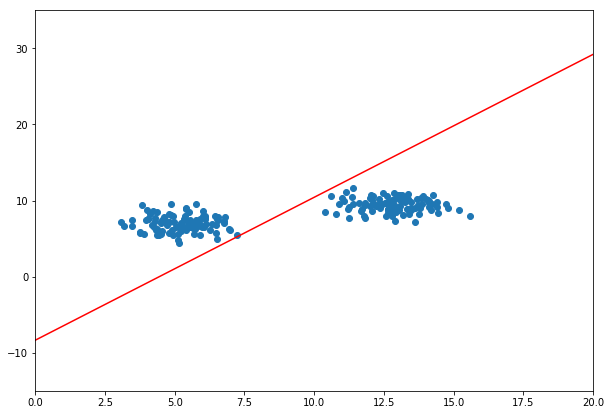

In [113]:
plt.figure(figsize=(10,7))
plt.scatter(data['x1'],data['x2'])
plt.plot(X1,yplot,'r-')
plt.xlim(0,20)
plt.ylim(-15,35)
plt.show()